The dataset is originally from the Centers for Disease Control and Prevention: link [here](https://nccd.cdc.gov/500_Cities/rdPage.aspx?rdReport=DPH_500_Cities.ComparisonReport)

The dataset was compiled on Kaggle: link [here](https://www.kaggle.com/cdc/500-cities)

The variables in this dataset can be divided into four groups:

### Location/Identificaion
**StateAbbr** - state abbreviation<br>
**PlaceName** - city name<br>
**PlaceFIPS** - Federal Information Processing System code. Identifies county <br>
**Population2010** - population from 2010 US Census<br>
**Geolocation** - latitude and longitude of location<br><br>

### Health Outcomes
**ARTHRITIS** - arthritis among adults aged 18 years and older<br>
**BPHIGH** - high blood pressure among adults aged 18 years and older<br>
**CANCER** - cancer (excluding skin cancer) among adulsts aged 18 years and older<br>
**CASTHMA** - current asthma among adults aged 18 years and older<br>
**CHD** - coronary heart disease among adults aged 18 years and older<br>
**COPD** - chronic obstructive pulmonary disease among adults aged 18 years and older<br>
**DENTAL** - visits to dentist or dental clinic among adults aged 18 years and older<br>
**DIABETES** - diagnosed diabetes among adults aged 18 years and older<br>
**HIGHCHOL** - high cholesterol among adults aged 18 years and older<br>
**KIDNEY** - chronic kidney disease among adults aged 18 years and older<br>
**MHLTH** - mental health not good for at least 14 days among adults aged 18 years and older<br>
**PHLTH** - physical health not good for at least 14 days among adults aged 18 years and older<br>
**STROKE** - stroke among adults aged 18 years and older<br>
**TEETHLOST** - all teeth lost among adults aged 65 years and older<br><br>

### Prevention
**ACCESS2** - current lack of health insurance among adults aged 18-64 years <br>
**BPMED** - taking medicine for high blood pressure control among adults aged 18 years and older with high blood pressure<br>
**CHECKUP** - visits to doctor for routine checkup within the past year among adults aged 18 years and older <br>
**CHOLSCREEN** - cholesterol screening among adults aged 18 years and older<br>
**COLON_SCREEN** - fecal occult blood test, sigmoidoscopy, or solonoscopy among adults aged 50-75 years <br>
**COREM** - older adult males aged 65 and older who are up to date on a core set of clinincal preventive services<br>
**COREW** - older adult females aged 65 and older who are up to date on a core set of clinincal preventive services<br>
**DENTAL** - visits to dentist or dental clinic among adults aged 18 years and older<br>
**MAMMOUSE** - mammography use among women aged 50-74 years<br>
**PAPTEST** - Papanicolaou smear use among adult women aged 21-65 years<br><br>

### Unhealthy Behaviors
**BINGE** - binge drinking among adults aged 18 years and older <br>
**CSMOKING** - current smoking among adults 18 and older<br>
**LPA** - no leisure-time physical activity aong adults aged 18 and older<br>
**OBESITY** - obesity among adults aged 18 and older<br>
**SLEEP** - sleeping less than 7 hours among adults aged 18 and older<br><br>

The crude prevalence and the age-adjusted prevalence for each of the features in the last three groups are measured in this dataset. The ranges in the 95% confidence interval are also in the dataset.<br>

For example, `ARTHRITIS_CrudePrev` represents the crude prevalence of arthritis and `ARTHRITIS_Adj95CI` represents the confidence interval of the age-adjusted prevalence of arthritis.

# Models

* [KMeans](#KMeans) - This model was the best since it gave the best distinction between clusters. See more [here](KMeans.ipynb). Validation of this model can be found [here](Validation.ipynb)
* [AgglomerativeClustering](#Agglomerative)
* [DBSCAN](#DBSCAN)
* [GaussianMixture](#GaussianMixture)
* [MeanShift](#MeanShift)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AgglomerativeClustering,
    AffinityPropagation,
    MeanShift,
)
from sklearn.mixture import GaussianMixture
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
cdc = pd.read_csv('500_Cities_CDC.csv')

In [3]:
cdc.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,AL,Birmingham,107000,212237,22.6,"(22.1, 23.0)",21.4,"(21.0, 21.8)",32.6,"(32.5, 32.8)",...,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)",26.1,"(25.1, 27.2)",25.9,"(25.0, 26.9)","(33.52756637730, -86.7988174678)"
1,AL,Hoover,135896,81619,10.6,"(10.2, 11.1)",10.2,"( 9.7, 10.7)",26.3,"(26.0, 26.6)",...,"(34.2, 35.0)",2.3,"( 2.2, 2.3)",2.2,"( 2.1, 2.3)",9.6,"( 8.6, 10.8)",9.5,"( 8.5, 10.9)","(33.37676027290, -86.8051937568)"
2,AL,Huntsville,137000,180105,17.4,"(16.9, 17.8)",16.3,"(15.9, 16.7)",30.0,"(29.8, 30.2)",...,"(39.4, 40.0)",3.3,"( 3.3, 3.4)",3.2,"( 3.1, 3.2)",14.9,"(14.1, 15.7)",14.7,"(13.8, 15.5)","(34.69896926710, -86.6387042882)"
3,AL,Mobile,150000,195111,20.0,"(19.6, 20.4)",19.1,"(18.7, 19.5)",33.1,"(32.9, 33.2)",...,"(42.0, 42.4)",4.3,"( 4.3, 4.4)",4.1,"( 4.0, 4.1)",24.3,"(23.4, 25.3)",24.1,"(23.1, 25.0)","(30.67762486480, -88.1184482714)"
4,AL,Montgomery,151000,205764,19.7,"(19.2, 20.2)",18.5,"(18.1, 19.0)",31.0,"(30.8, 31.2)",...,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)",21.2,"(20.3, 22.2)",21.2,"(20.1, 22.2)","(32.34726453330, -86.2677059552)"


I split the Geolocation column into two columns for latitude and longitude:

In [4]:
lat_lon = cdc['Geolocation'].str.split(', ', expand= True)
lat_lon[0] = lat_lon[0].str.replace('(', '')
lat_lon[1] = lat_lon[1].str.replace(')', '')
lat_lon = lat_lon.astype('double')
lat_lon.dtypes

0    float64
1    float64
dtype: object

In [5]:
cdc['Lat'] = lat_lon[0]
cdc['Lon'] = lat_lon[1]
cdc = cdc.drop(columns=['Geolocation', 'StateAbbr', 'PlaceName', 'PlaceFIPS'])

In [6]:
cdc.head()

,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,ARTHRITIS_AdjPrev,ARTHRITIS_Adj95CI,BINGE_CrudePrev,...,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Lat,Lon
0,212237,22.6,"(22.1, 23.0)",21.4,"(21.0, 21.8)",32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,...,5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)",26.1,"(25.1, 27.2)",25.9,"(25.0, 26.9)",33.527566,-86.798817
1,81619,10.6,"(10.2, 11.1)",10.2,"( 9.7, 10.7)",26.3,"(26.0, 26.6)",25.3,"(25.0, 25.6)",15.4,...,2.3,"( 2.2, 2.3)",2.2,"( 2.1, 2.3)",9.6,"( 8.6, 10.8)",9.5,"( 8.5, 10.9)",33.376760,-86.805194
2,180105,17.4,"(16.9, 17.8)",16.3,"(15.9, 16.7)",30.0,"(29.8, 30.2)",29.4,"(29.2, 29.6)",12.2,...,3.3,"( 3.3, 3.4)",3.2,"( 3.1, 3.2)",14.9,"(14.1, 15.7)",14.7,"(13.8, 15.5)",34.698969,-86.638704
3,195111,20.0,"(19.6, 20.4)",19.1,"(18.7, 19.5)",33.1,"(32.9, 33.2)",31.8,"(31.7, 32.0)",12.5,...,4.3,"( 4.3, 4.4)",4.1,"( 4.0, 4.1)",24.3,"(23.4, 25.3)",24.1,"(23.1, 25.0)",30.677625,-88.118448
4,205764,19.7,"(19.2, 20.2)",18.5,"(18.1, 19.0)",31.0,"(30.8, 31.2)",31.4,"(31.2, 31.6)",12.5,...,4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)",21.2,"(20.3, 22.2)",21.2,"(20.1, 22.2)",32.347265,-86.267706


In [7]:
age_cols = list(cdc.filter(like='AdjPrev'))
crude_cols = list(cdc.filter(like='CrudePrev'))
ci_cols = list(cdc.filter(like='95CI'))

I won't be using the confidence interval columns

In [8]:
cdc = cdc.drop(columns = ci_cols)

In [9]:
cdc_age = cdc[age_cols]

In [10]:
cdc_crude = cdc[crude_cols]

In [11]:
scaler = StandardScaler()
cdc_scaled = scaler.fit_transform(cdc)
cdc_age_scaled = pd.DataFrame(scaler.fit_transform(cdc_age), index = cdc_age.index, columns = cdc_age.columns)
cdc_crude_scaled = pd.DataFrame(scaler.fit_transform(cdc_crude), index = cdc_crude.index, columns = cdc_crude.columns)

In [12]:
cdc_age_scaled.shape

(500, 28)

# KMeans

[Back to top](#Models)

## Age-Adjusted

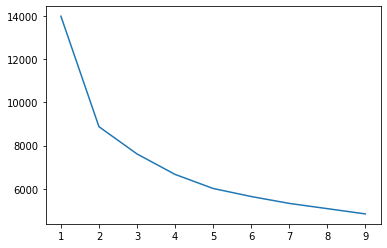

In [13]:
ks = range(1,10)
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(cdc_age_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias)

In [14]:
k = 4
kmeans_age = KMeans(n_clusters = k)
kmeans_age.fit(cdc_age_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

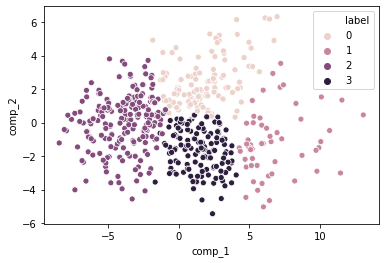

In [15]:
pca = PCA(n_components=2).fit_transform(cdc_age_scaled)
pca_df = pd.DataFrame(pca, columns=['comp_1', 'comp_2'])
pca_df['label'] = kmeans_age.labels_
sns.scatterplot(data = pca_df, x ='comp_1', y ='comp_2', hue = 'label')

In [16]:
cdc_age_scaled['label'] = kmeans_age.labels_

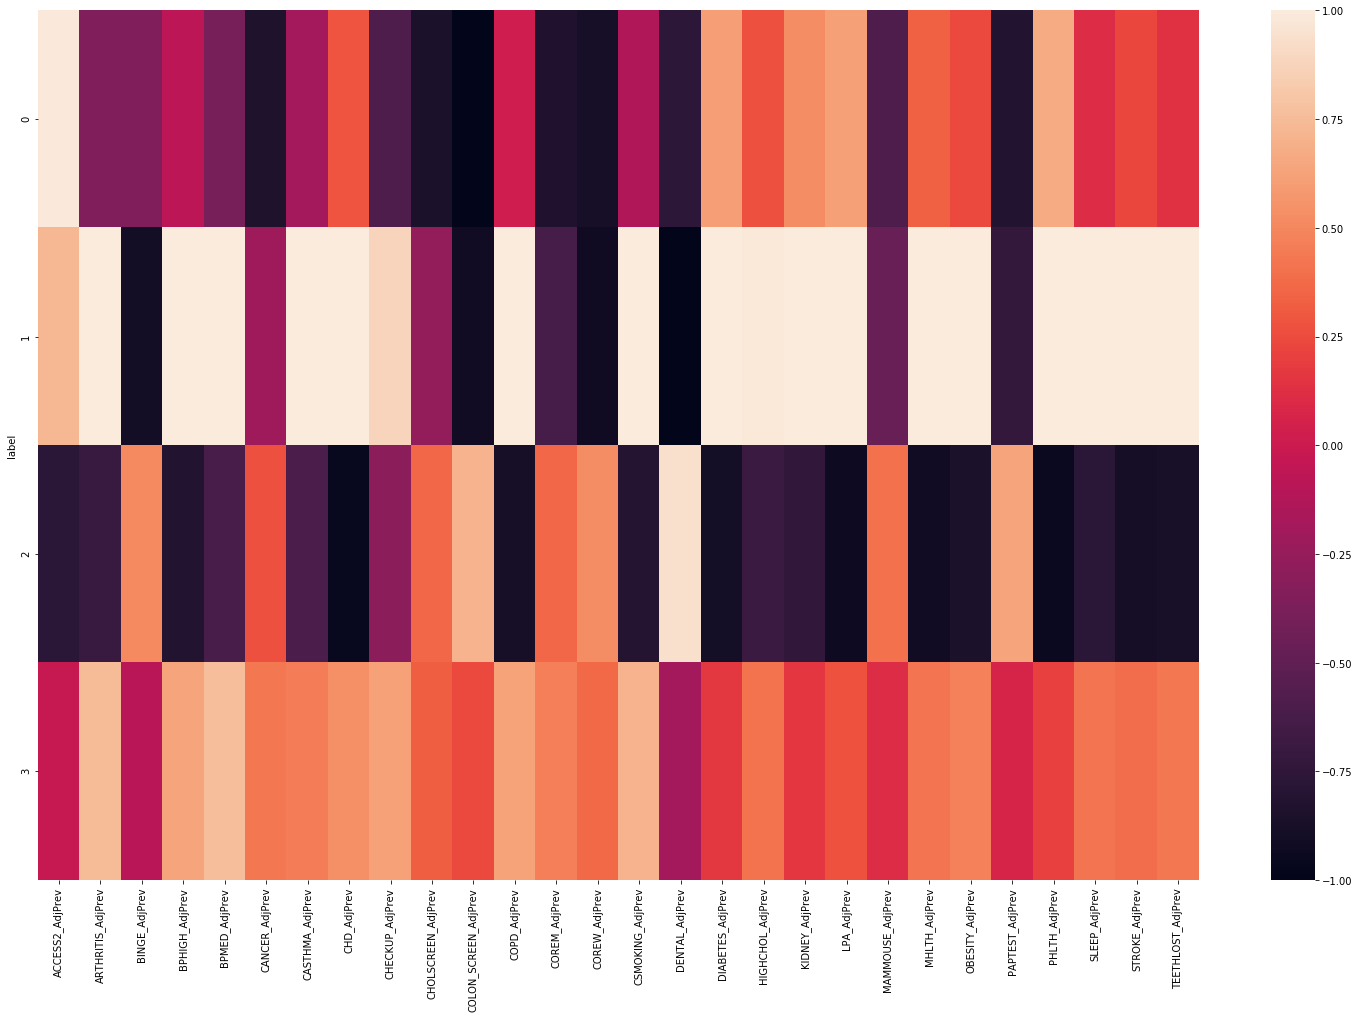

In [17]:
fig, ax = plt.subplots(1,1, figsize=(26,16)) 

sns.heatmap(cdc_age_scaled.groupby('label').mean(), ax=ax, vmin = -1, vmax = 1)

## Crude

In [18]:
kmeans_crude = KMeans(n_clusters = k)
kmeans_crude.fit(cdc_crude_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

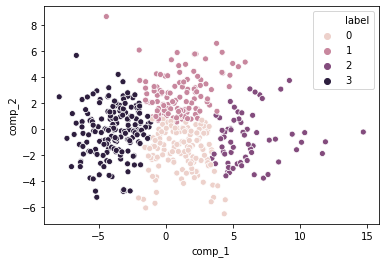

In [19]:
pca = PCA(n_components=2).fit_transform(cdc_crude_scaled)
pca_df = pd.DataFrame(pca, columns=['comp_1', 'comp_2'])
pca_df['label'] = kmeans_crude.labels_
sns.scatterplot(data = pca_df, x ='comp_1', y ='comp_2', hue = 'label')

In [20]:
cdc_crude_scaled['label'] = kmeans_crude.labels_

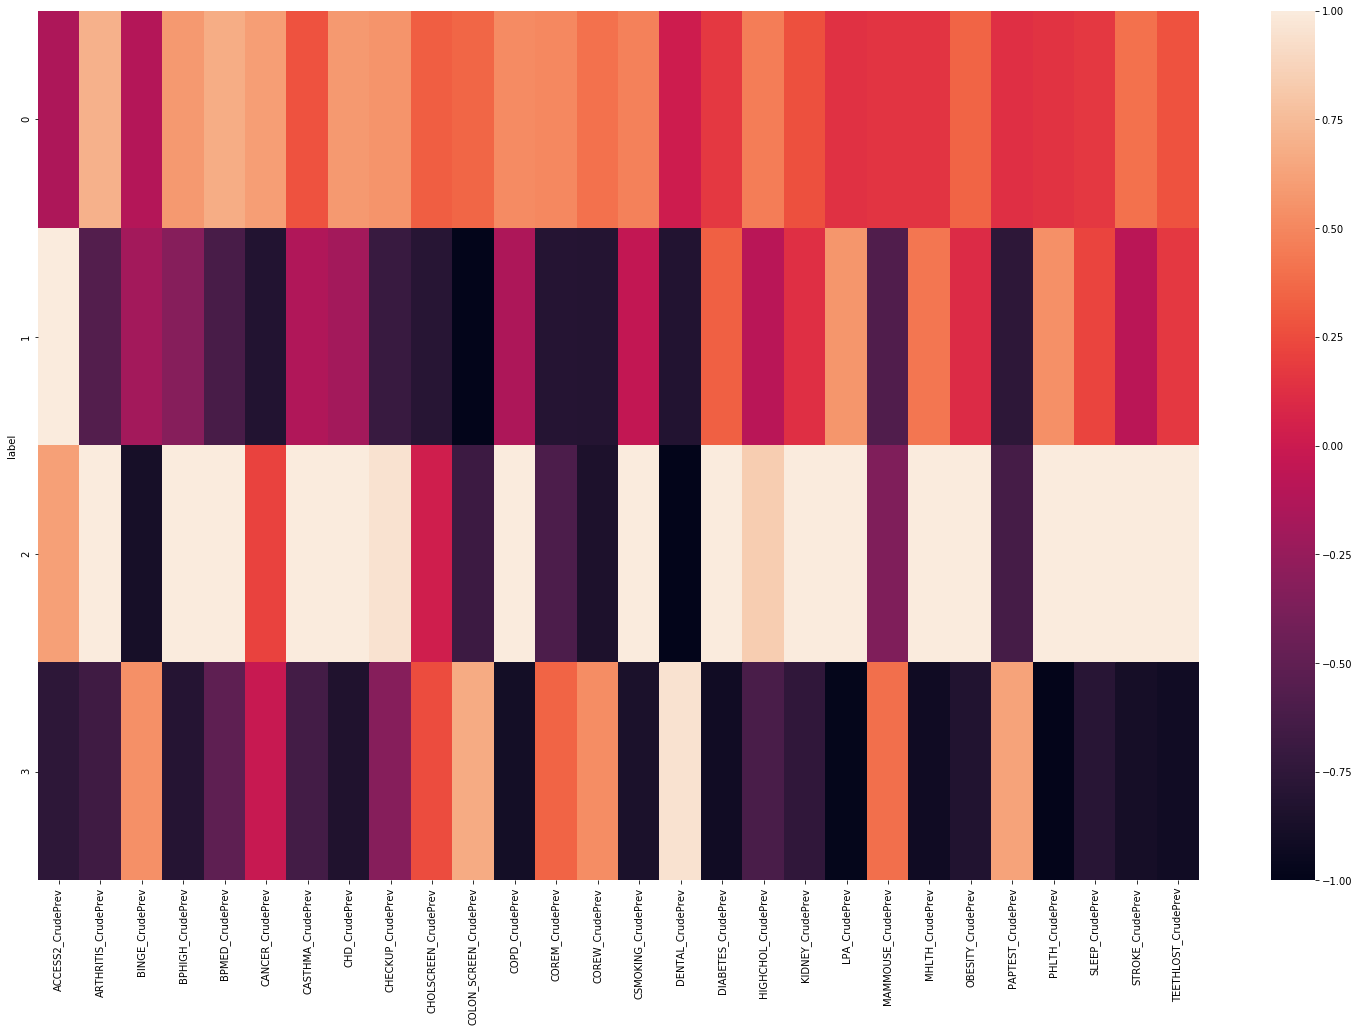

In [21]:
fig, ax = plt.subplots(1,1, figsize=(26,16)) 

sns.heatmap(cdc_crude_scaled.groupby('label').mean(), ax=ax, vmin = -1, vmax = 1)

Since age adjusted data gives better separation between clusters, I will only use the age adjusted data.

# Agglomerative

[Back to top](#Models)

## Age-Adjusted

### Average Linkage

In [22]:
agg_age = AgglomerativeClustering(linkage='average',
                                      affinity = 'cosine',
                                      n_clusters = 4)

agg_age.fit(cdc_age_scaled)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

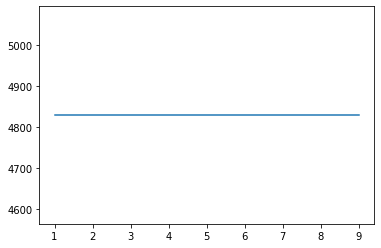

In [23]:
ks = range(1,10)
inertias = []
for k in range(1, 10):
    agg = AgglomerativeClustering(n_clusters = k,
                                  linkage ='average',
                                  affinity ='cosine')
    agg.fit(cdc_age_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias)

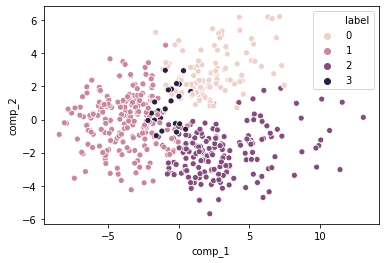

In [24]:
pca = PCA(n_components=2).fit_transform(cdc_age_scaled)
pca_df = pd.DataFrame(pca, columns=['comp_1', 'comp_2'])
pca_df['label'] = agg_age.labels_
sns.scatterplot(data = pca_df, x ='comp_1', y ='comp_2', hue = 'label')

In [25]:
cdc_crude['label'] = agg_age.labels_
cdc_crude.groupby('label').mean().style.background_gradient()

C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,27.737037,20.217593,16.054630,28.851852,70.417593,4.836111,9.069444,5.661111,64.662963,69.129630,54.587037,5.955556,26.479630,25.207407,17.845370,55.338889,11.313889,36.867593,2.845370,27.647222,73.510185,13.213889,24.071296,77.063889,14.099074,36.912037,2.914815,15.317593
1,13.922660,20.439409,17.943842,26.721675,71.323645,5.758621,8.585222,4.905911,66.534975,74.316256,64.878818,4.898522,33.265025,32.450246,14.959113,68.926601,8.061084,35.168473,2.351232,19.125123,76.748768,10.299015,20.058621,81.912315,9.989163,32.494089,2.329557,10.471429
2,21.120606,26.115758,15.641818,34.494545,76.631515,5.818788,10.483636,6.678182,71.339394,72.413939,60.689091,7.741212,32.237576,29.929697,22.566061,57.640606,11.504242,37.615152,2.955758,27.370303,75.090303,14.130909,27.209091,78.498788,13.996970,39.055152,3.500606,19.244848
3,16.683333,23.825000,18.075000,28.425000,69.462500,6.195833,10.020833,5.758333,60.566667,69.100000,61.704167,6.491667,31.658333,29.987500,18.745833,62.429167,8.737500,36.187500,2.854167,19.741667,72.033333,12.654167,22.433333,77.583333,12.779167,32.808333,2.812500,13.979167


# DBSCAN

[Back to top](#Models)

## Age-Adjusted

In [26]:
dbscan_age = DBSCAN(eps = 3, min_samples = 12)
dbscan_age.fit(cdc_age_scaled)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

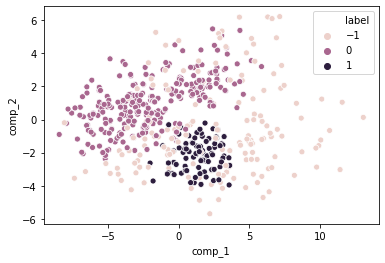

In [27]:
pca = PCA(n_components=2).fit_transform(cdc_age_scaled)
pca_df = pd.DataFrame(pca, columns=['comp_1', 'comp_2'])
pca_df['label'] = dbscan_age.labels_
sns.scatterplot(data = pca_df, x ='comp_1', y ='comp_2', hue = 'label')

# Gaussian Mixture

[Back to top](#Models)

## Age-Adjusted

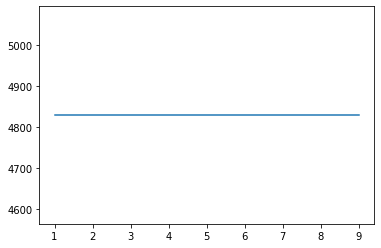

In [28]:
ks = range(1,10)
inertias = []
for k in range(1, 10):
    gmm = GaussianMixture(n_components = k)
    gmm.fit(cdc_age_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias)

In [29]:
gmm_age = GaussianMixture(n_components=4)
gmm_age.fit(cdc_age_scaled)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

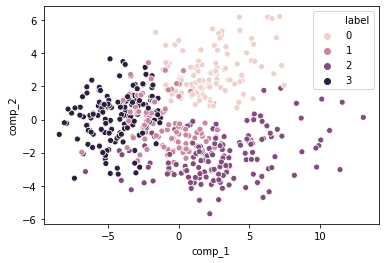

In [30]:
pca = PCA(n_components=2).fit_transform(cdc_age_scaled)
pca_df = pd.DataFrame(pca, columns=['comp_1', 'comp_2'])
pca_df['label'] = gmm_age.fit_predict(cdc_age_scaled)
sns.scatterplot(data = pca_df, x ='comp_1', y ='comp_2', hue = 'label')

# MeanShift

[Back to top](#Models)

In [31]:
meanshift_age = MeanShift(bandwidth = 5)
meanshift_age.fit(cdc_age_scaled)

MeanShift(bandwidth=5, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

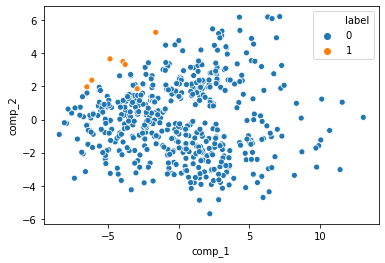

In [32]:
pca = PCA(n_components=2).fit_transform(cdc_age_scaled)
pca_df = pd.DataFrame(pca, columns=['comp_1', 'comp_2'])
pca_df['label'] = meanshift_age.fit_predict(cdc_age_scaled)
sns.scatterplot(data = pca_df, x ='comp_1', y ='comp_2', hue = 'label')

# AffinityPropagation

[Back to top](#Models)

In [33]:
ap_age = AffinityPropagation(affinity = 'euclidean')
ap_age.fit(cdc_age_scaled)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

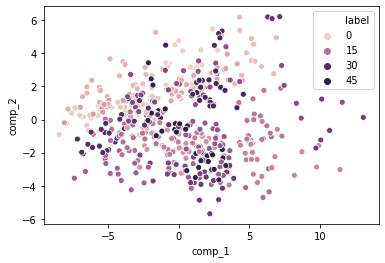

In [34]:
pca = PCA(n_components=2).fit_transform(cdc_age_scaled)
pca_df = pd.DataFrame(pca, columns=['comp_1', 'comp_2'])
pca_df['label'] = ap_age.fit_predict(cdc_age_scaled)
sns.scatterplot(data = pca_df, x ='comp_1', y ='comp_2', hue = 'label')